# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [243]:
# import libraries
import pandas as pd




In [244]:
# Read in the customer data
customer = pd.read_csv('../Data/maven_music_customers.csv')
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [245]:
# Read in the listening history
history = pd.read_excel('../Data/maven_music_listening_history.xlsx')
history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [246]:
# Hint: Where might you find listening history data beyond the ID's?


In [247]:
# Read in the audio data
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [248]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=2)
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

#### brief check of data

In [249]:
import warnings
warnings.filterwarnings("ignore")

def check_df(df):
    """
    Quick check of a DataFrame for null and unique values
    
    Args:
    - df: pandas DataFrame
    
    Returns:
    - summary: pandas DataFrame containing the column names, count of null values,
               percentage of null values, and number of unique values for each column
               in the input DataFrame.
    """
    
    total_rows = len(df)
    summary = pd.DataFrame(columns=['Column', 'Null Count', 'Null Percentage', 'Unique Count','dtypes','example_values'])
    
    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_percentage = round((null_count / total_rows) * 100, 2)
        unique_count = df[column].nunique()
        dtypes = df[column].dtypes
        example_values = df[column].sample(5).tolist()
        summary = summary.append({'Column': column, 'Null Count': null_count,
                                  'Null Percentage': null_percentage,
                                  'Unique Count': unique_count,
                                  'dtypes': dtypes,
                                  'example_values': example_values}, ignore_index=True)
        
    
    
    return summary

def summary_df(df):
    "print(summary_df)"

In [250]:
# Check the data types - customer 
check_df(customer)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,Customer ID,0,0.0,30,int64,"[6822, 5826, 5404, 5004, 7224]"
1,Customer Name,0,0.0,30,object,"[Sonata Nash, Harmony Heart, Lyric Bell, Jazz ..."
2,Email,0,0.0,30,object,"[Email: murphy.reed.music@email.com, Email: be..."
3,Member Since,0,0.0,18,object,"[4/1/23, 4/8/23, 5/1/23, 5/1/23, 3/28/23]"
4,Subscription Plan,5,16.67,2,object,"[Premium (No Ads), Basic (Ads), Basic (Ads), B..."
5,Subscription Rate,0,0.0,4,object,"[$2.99 , $7.99 , $2.99 , $2.99 , $9.99 ]"
6,Discount?,23,76.67,1,object,"[nan, nan, nan, nan, nan]"
7,Cancellation Date,17,56.67,3,object,"[nan, nan, 6/2/23, 6/1/23, nan]"


In [251]:
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [252]:
# Check the data types - history 
check_df(history)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,Customer ID,0,0.0,30,int64,"[7579, 6588, 5267, 5267, 5001]"
1,Session ID,0,0.0,90,int64,"[109690, 105123, 100527, 110113, 105116]"
2,Audio Order,0,0.0,15,int64,"[4, 3, 3, 6, 6]"
3,Audio ID,0,0.0,17,int64,"[111, 106, 107, 110, 108]"
4,Audio Type,0,0.0,2,object,"[Song, Song, Song, Song, Song]"


In [253]:
# data looks ok.

In [254]:
# Check the data types - audio 
check_df(audio)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,ID,0,0.0,17,object,"[Song-102, Song-104, Podcast-204, Song-105, So..."
1,Name,0,0.0,17,object,"[Jokes on Jokes, Midnight Blues, Crime Chronic..."
2,Genre,0,0.0,7,object,"[Comedy, Hip Hop, Pop Music, Comedy, Hip Hop]"
3,Popularity,0,0.0,15,int64,"[23, 8, 20, 17, 63]"


In [255]:
# data looks ok.

In [256]:
# Check the data types - session 
check_df(session)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,Session ID,0,0.0,90,int64,"[108049, 111057, 109656, 102298, 105543]"
1,Session Log In Time,0,0.0,90,datetime64[ns],"[2023-05-23 06:20:00, 2023-05-11 19:03:00, 202..."


In [257]:
# data looks ok.

#### Convert objects to numeric and datetime fields

In [258]:

customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [259]:
customer['Subscription Rate'].unique()

array(['$2.99 ', '$9.99 ', '$99.99 ', '$7.99 '], dtype=object)

In [260]:
customer['Member Since'] = pd.to_datetime(customer['Member Since'])
customer['Cancellation Date'] = pd.to_datetime(customer['Cancellation Date'])
customer['Subscription Rate'] = pd.to_numeric(customer['Subscription Rate'].str.replace('$',''))

In [261]:
customer.dtypes

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [262]:
# Look for NaN values in the data
check_df(customer)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,Customer ID,0,0.0,30,int64,"[7087, 7583, 5761, 6092, 7579]"
1,Customer Name,0,0.0,30,object,"[Chord Hayes, Harmony Greene, Symphony Rhodes,..."
2,Email,0,0.0,30,object,"[Email: jazzy.sax@email.com, Email: fitzgerald..."
3,Member Since,0,0.0,18,datetime64[ns],"[2023-05-01 00:00:00, 2023-03-28 00:00:00, 202..."
4,Subscription Plan,5,16.67,2,object,"[nan, Premium (No Ads), Basic (Ads), Basic (Ad..."
5,Subscription Rate,0,0.0,4,float64,"[9.99, 99.99, 7.99, 2.99, 2.99]"
6,Discount?,23,76.67,1,object,"[Yes, Yes, nan, Yes, nan]"
7,Cancellation Date,17,56.67,3,datetime64[ns],"[NaT, 2023-06-02 00:00:00, NaT, NaT, NaT]"


#### ii. Inconsistent Text & Typos

In [263]:
# Look for inconsistent text & typos
customer['Subscription Plan'].value_counts() ,  customer['Discount?'].value_counts(), customer['Cancellation Date'].value_counts()

(Premium (No Ads)    13
 Basic (Ads)         12
 Name: Subscription Plan, dtype: int64,
 Yes    7
 Name: Discount?, dtype: int64,
 2023-06-01    6
 2023-06-02    5
 2023-06-03    2
 Name: Cancellation Date, dtype: int64)

In [264]:
#check nan from subscription plan
customer[customer['Subscription Plan'].isna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,2.99,NaN,NaT


In [265]:
customer[['Subscription Rate','Subscription Plan']].drop_duplicates()

,Subscription Rate,Subscription Plan
0,2.99,Basic (Ads)
1,2.99,NaN
6,9.99,Premium (No Ads)
15,99.99,Premium (No Ads)
21,7.99,Premium (No Ads)


In [266]:
# fill Nan value subscription plan with 'Basic(Ads)'
customer['Subscription Plan'] = customer['Subscription Plan'].fillna('Basic (Ads)')
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,NaN,NaT


In [267]:
# check for discount column
customer['Discount?'].value_counts()

Yes    7
Name: Discount?, dtype: int64

In [268]:
# should be a binary value - Yes/No
# seems like Nan values here is 'No'
import numpy as np

customer['Discount?'] = np.where(customer['Discount?'] =='Yes',1,0)
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [269]:
# check cancellation date column

In [270]:
customer['Cancellation Date']

0           NaT
1           NaT
2    2023-06-01
3           NaT
4           NaT
5    2023-06-03
6           NaT
7    2023-06-02
8           NaT
9           NaT
10          NaT
11          NaT
12   2023-06-02
13   2023-06-01
14          NaT
15   2023-06-02
16          NaT
17          NaT
18          NaT
19   2023-06-01
20          NaT
21          NaT
22   2023-06-02
23   2023-06-02
24          NaT
25   2023-06-01
26   2023-06-01
27          NaT
28   2023-06-03
29   2023-06-01
Name: Cancellation Date, dtype: datetime64[ns]

In [271]:
# Look for duplicate rows
customer.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,8.556667,0.233333
std,814.255587,17.517840,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,99.990000,1.000000


<AxesSubplot:>

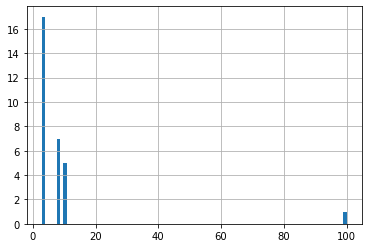

In [272]:
customer['Subscription Rate'].hist(bins=100)

In [273]:
customer[customer['Subscription Rate']>7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [274]:
# change value 99.99 type error
customer.iloc[15,5] = 9.99

In [275]:
customer.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


<AxesSubplot:>

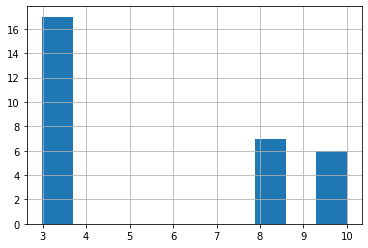

In [276]:
customer['Subscription Rate'].hist()

In [277]:
# check history data

In [278]:
history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [279]:
check_df(history)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,Customer ID,0,0.0,30,int64,"[7401, 5763, 5759, 6588, 7224]"
1,Session ID,0,0.0,90,int64,"[109683, 100525, 105116, 103012, 110110]"
2,Audio Order,0,0.0,15,int64,"[5, 5, 2, 3, 4]"
3,Audio ID,0,0.0,17,int64,"[109, 204, 111, 101, 111]"
4,Audio Type,0,0.0,2,object,"[Song, Song, Song, Song, Song]"


In [280]:
# check audio data

In [281]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [282]:
check_df(audio)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,ID,0,0.0,17,object,"[Song-111, Podcast-204, Song-103, Podcast-202,..."
1,Name,0,0.0,17,object,"[Dance All Night, Sunset Boulevard, Laugh Out ..."
2,Genre,0,0.0,7,object,"[True Crime, Pop Music, Pop, Comedy, Pop]"
3,Popularity,0,0.0,15,int64,"[52, 4, 5, 80, 2]"


In [283]:
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [284]:
audio['Genre'] = np.where(audio['Genre'] == 'Pop Music', 'Pop', audio['Genre'])
audio

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52
5,Song-106,My Old Dog and My True Love,Country,23
6,Song-107,Dirt Road Romance,Country,30
7,Song-108,Chase the Dream,Hip Hop,4
8,Song-109,Rise Above,Hip Hop,9
9,Song-110,Boss Moves,Hip Hop,28


In [285]:
audio['Genre'].value_counts()

Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: Genre, dtype: int64

In [286]:
# check session data

In [287]:
session.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


In [288]:
check_df(session)

,Column,Null Count,Null Percentage,Unique Count,dtypes,example_values
0,Session ID,0,0.0,90,int64,"[102148, 100522, 107858, 100824, 105399]"
1,Session Log In Time,0,0.0,90,datetime64[ns],"[2023-05-23 06:20:00, 2023-05-09 01:43:00, 202..."


#### iii. Duplicate Rows

In [289]:
customer[customer.duplicated()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date


In [290]:
history[history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [291]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [292]:
session[session.duplicated()]

,Session ID,Session Log In Time


#### iv. Outliers

In [293]:
# Look for outliers
customer.describe()

,Customer ID,Subscription Rate,Discount?
count,30.000000,30.000000,30.000000
mean,6276.333333,5.556667,0.233333
std,814.255587,3.058998,0.430183
min,5001.000000,2.990000,0.000000
25%,5759.500000,2.990000,0.000000
50%,6196.000000,2.990000,0.000000
75%,6823.500000,7.990000,0.000000
max,7583.000000,9.990000,1.000000


In [294]:
history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [295]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [296]:
session.describe()

,Session ID
count,90.000000
mean,105619.788889
std,3616.208569
min,100520.000000
25%,102149.000000
50%,105390.500000
75%,109658.250000
max,111333.000000


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [297]:
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [298]:
# Create a 'Cancelled' column
customer['Cancelled'] = np.where(customer['Cancellation Date'].notna(),1,0)
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [299]:
# Create an updated 'Email' column without the Email: portion
customer['Email'] = customer['Email'].str[6:]
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [300]:
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [301]:
customer[customer['Cancellation Date'].notna()]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1
15,6229,Symphony Rhodes,rhodes.symphony@email.com,2023-04-06,Premium (No Ads),9.99,0,2023-06-02,1
19,6588,Harmony Bass,bass.harmony@email.com,2023-04-16,Basic (Ads),2.99,0,2023-06-01,1
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [302]:
# How long were customers members before they cancelled?
customer['Cancellation Date'] - customer['Member Since']

0        NaT
1        NaT
2    80 days
3        NaT
4        NaT
5    75 days
6        NaT
7    72 days
8        NaT
9        NaT
10       NaT
11       NaT
12   65 days
13   61 days
14       NaT
15   57 days
16       NaT
17       NaT
18       NaT
19   46 days
20       NaT
21       NaT
22   32 days
23   32 days
24       NaT
25   24 days
26   24 days
27       NaT
28   18 days
29   16 days
dtype: timedelta64[ns]

In [303]:
# Cancellation rate for those who had a discount
discount_yes = customer[customer['Discount?'] ==1]
discount_yes

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
28,7581,Lyric Keys,keysoflyric@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-03,1
29,7583,Melody Singer,melodic.singer@email.com,2023-05-16,Premium (No Ads),7.99,1,2023-06-01,1


In [304]:
discount_yes['Cancelled'].sum() / discount_yes['Cancelled'].count()

0.8571428571428571

In [305]:
# Cancellation rate for those who did not have a discount
discount_no = customer[customer['Discount?'] ==0]
discount_no

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
6,5581,Reed Sharp,sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT,0
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
8,5761,Sonata Nash,musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT,0
9,5763,Jazz Coleman,coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT,0


In [306]:
discount_no['Cancelled'].sum() / discount_no['Cancelled'].count()

0.30434782608695654

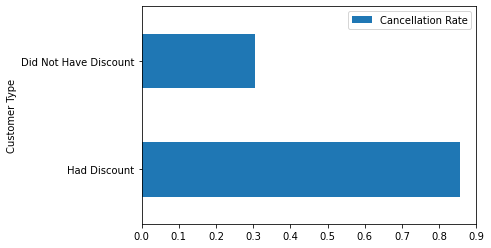

In [307]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571],
            ['Did Not Have Discount', 0.30434782608695654]],
            columns = ['Customer Type', 'Cancellation Rate']).plot.barh(x = 'Customer Type', y = 'Cancellation Rate', );

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [308]:
history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [309]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop,5
3,Song-104,Glowing Hearts,Pop,10
4,Song-105,Pop Rocks,Pop,52


In [310]:
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [311]:
# Split the ID in the audio data so the column can be joined with other tables
audio_clean = pd.DataFrame(audio['ID'].str.split('-').to_list()).rename(columns={0: 'Type', 1:'Audio ID'})
audio_clean

,Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105
5,Song,106
6,Song,107
7,Song,108
8,Song,109
9,Song,110


In [312]:
audio_all = pd.concat([audio_clean, audio], axis = 1)
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [313]:
# Hint: Check the data type of Audio ID in the audio table
audio_all.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [314]:
audio_all['Audio ID'] = audio_all['Audio ID'].astype('int')
audio_all.head()

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop,5
3,Song,104,Song-104,Glowing Hearts,Pop,10
4,Song,105,Song-105,Pop Rocks,Pop,52


In [315]:
audio_all.dtypes

Type          object
Audio ID       int32
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [316]:
# merge
df = history.merge(audio_all, how='left', on='Audio ID')
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


<AxesSubplot:ylabel='Frequency'>

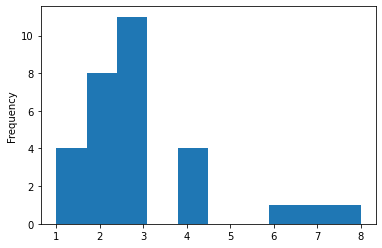

In [318]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [320]:
# The most popular genres that customers listened to
df['Genre'].value_counts()

Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: Genre, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [324]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [322]:
# Create a dataframe ready for modeling
model_df = customer[['Customer ID', 'Cancelled', 'Discount?']]
model_df

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0
5,5404,1,0
6,5581,0,0
7,5759,1,0
8,5761,0,0
9,5763,0,0


In [326]:
# Calculate the number of listening sessions for each customer
number_of_sessions = df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [327]:
model_df = model_df.merge(number_of_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [331]:
df.Genre.unique()

array(['Pop', 'Hip Hop', 'Country', 'True Crime', 'Comedy', 'Jazz'],
      dtype=object)

In [332]:
# get dummy variables for each genre
pd.get_dummies(df['Genre'])

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
500,0,0,0,1,0,0
501,1,0,0,0,0,0
502,0,0,1,0,0,0
503,0,0,1,0,0,0


In [347]:
genres = pd.concat([df['Customer ID'], pd.get_dummies(df['Genre'])],axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [348]:
history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [351]:
# add a column for total songs / podcasts listened to
total_audio = history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [352]:
# create a master audio table to calculate percentages
df_audio = genres.merge(total_audio, how = 'left', on = 'Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [354]:
# Percent pop
model_df['Pct Pop'] = round(df_audio['Pop'] / df_audio['Total Audio'] * 100, 2)
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Pct Pop
0,5001,0,0,8,56.67
1,5002,0,0,4,0.00
2,5004,1,0,1,100.00
3,5267,0,0,7,51.11
4,5338,0,0,4,0.00
5,5404,1,0,1,100.00
6,5581,0,0,3,0.00
7,5759,1,0,2,100.00
8,5761,0,0,3,0.00
9,5763,0,0,6,64.52


In [355]:
# Percent podcasts
model_df['Pct Podcasts'] = round((df_audio['Comedy']+ df_audio['True Crime']) / df_audio['Total Audio'] * 100, 2)
model_df

,Customer ID,Cancelled,Discount?,Number of Sessions,Pct Pop,Pct Podcasts
0,5001,0,0,8,56.67,0.00
1,5002,0,0,4,0.00,0.00
2,5004,1,0,1,100.00,0.00
3,5267,0,0,7,51.11,0.00
4,5338,0,0,4,0.00,0.00
5,5404,1,0,1,100.00,0.00
6,5581,0,0,3,0.00,100.00
7,5759,1,0,2,100.00,0.00
8,5761,0,0,3,0.00,100.00
9,5763,0,0,6,64.52,0.00


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [356]:
import seaborn as sns

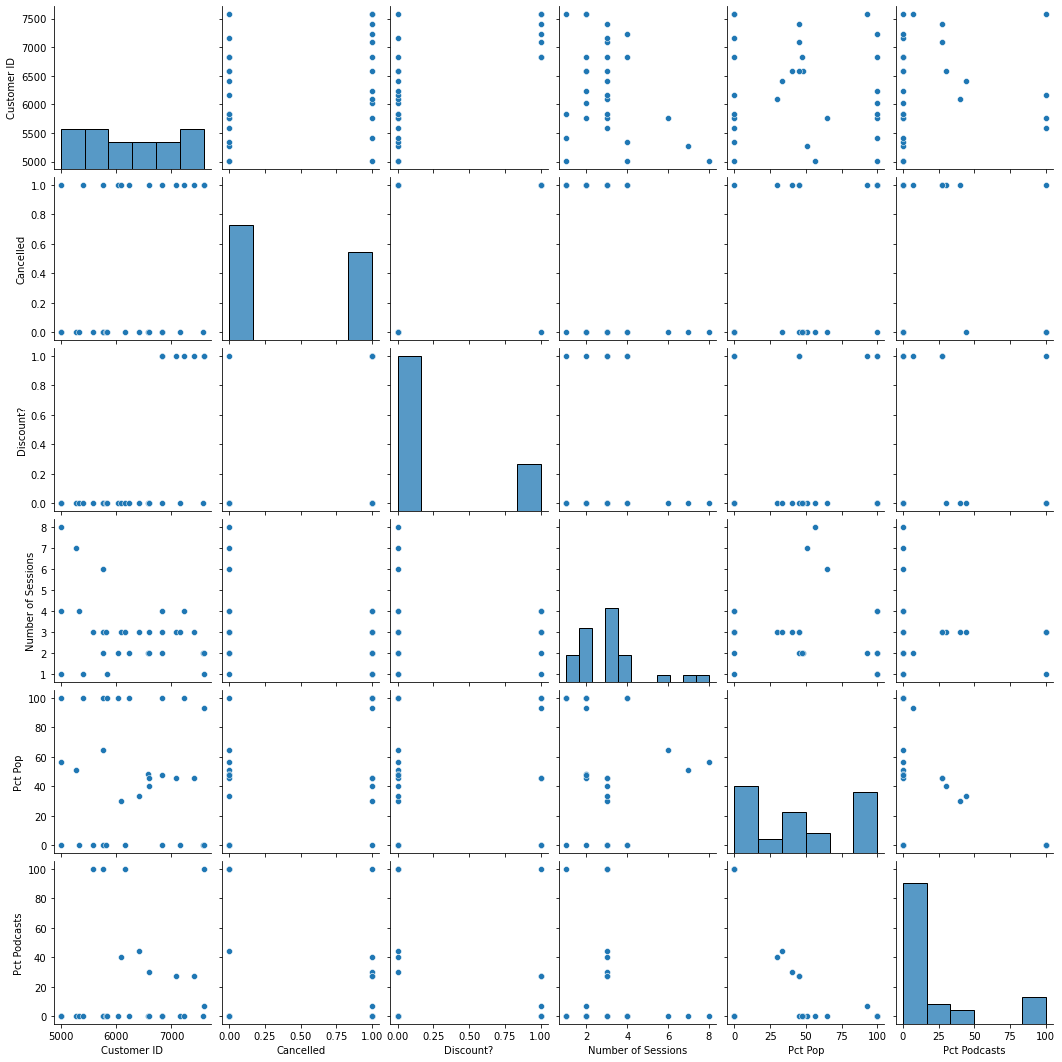

In [357]:
sns.pairplot(model_df)

In [358]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Pct Pop,Pct Podcasts
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076140,0.083072
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585620,-0.035419
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112664,0.062925
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131143,-0.125458
Pct Pop,-0.076140,0.585620,0.112664,-0.131143,1.000000,-0.487200
Pct Podcasts,0.083072,-0.035419,0.062925,-0.125458,-0.487200,1.000000


In [359]:
# Observations
# listen more pop songs, more cancellation 
# more discount, more cancellation
# more listening session, less cancellation
# postcast no correlation to cancellations